In [174]:
import nltk
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import swifter

In [175]:
df = pd.read_csv('dataset/data.csv')

In [176]:
df['subject'].value_counts()

subject
politicsNews       11272
News                9050
worldnews           8727
politics            6841
left-news           2482
Government News     1570
Name: count, dtype: int64

## Take balanced classes

In [177]:
# subject = full_df['subject'].unique()
# df = []

# for sub in subject:
#     sampled_rows = full_df[full_df['subject'] == sub].head(2000)
#     df.append(sampled_rows) # 

# df = pd.concat(df, ignore_index=True)

In [178]:
df.head(10)

,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,1,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,1,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,1,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,1,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,1,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [179]:
# df=full_df.copy()

In [180]:
d=full_df['date'].apply(lambda x: x.split()[-1])


In [181]:
d=d.value_counts().head(3)

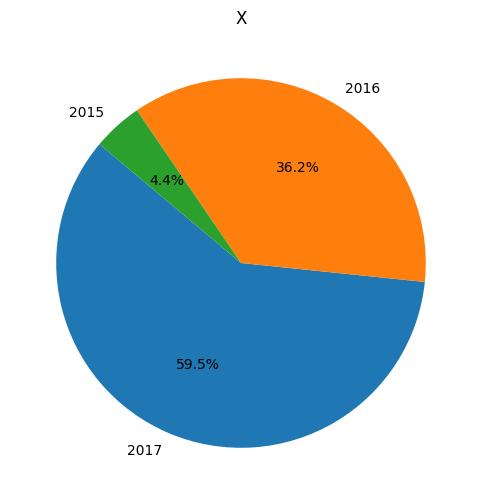

In [182]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
plt.pie(d, labels=d.index, autopct='%1.1f%%', startangle=140)
plt.title("X")
plt.show()

In [224]:
f = df['text'][df['label'] == 1].iloc[6
                                    ]

In [225]:
f

'WEST PALM BEACH, Fla (Reuters) - President Donald Trump said on Thursday he believes he will be fairly treated in a special counsel investigation into Russian meddling in the U.S. presidential election, but said he did not know how long the probe would last. The federal investigation has hung over Trump’s White House since he took office almost a year ago, and some Trump allies have in recent weeks accused the team of Justice Department Special Counsel Robert Mueller of being biased against the Republican president. But in an interview with the New York Times, Trump appeared to shrug off concerns about the investigation, which was prompted by U.S. intelligence agencies’ conclusion that Russia tried to help Trump defeat Democrat Hillary Clinton by hacking and releasing embarrassing emails and disseminating propaganda. “There’s been no collusion. But I think he’s going to be fair,” Trump said in what the Times described as a 30-minute impromptu interview at his golf club in West Palm Be

In [185]:
df['subject'].value_counts()

subject
politicsNews       11272
News                9050
worldnews           8727
politics            6841
left-news           2482
Government News     1570
Name: count, dtype: int64

In [186]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [187]:
import swifter

In [ ]:
# Function for preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)

    # إزالة الإيميلات
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '', text)

    # إزالة الروابط
    text = re.sub(r'http\S+|www\.\S+', '', text)

    # إزالة أي شيء آخر غير الأحرف والمسافات
    text = re.sub(r'[^\w\s]', '', text)

    # إزالة المسافات الزائدة
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # filtered_tokens = [word for word in tokens if word not in string.punctuation]

    # Remove stopwords and lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    return ' '.join(lemmatized_tokens)

# Apply preprocessing on title and text
df['clean_text'] = df['title'] + " " + df['text']
df['clean_text'] = df['clean_text'].swifter.apply(preprocess_text)


Pandas Apply: 100%|██████████| 39942/39942 [00:53<00:00, 743.74it/s] 


In [198]:
df['clean_text'][0]

'washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republican u representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase nondefense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration already willing say going increase nondefense discretionary spending percent meadow chairman small influential house freedom caucus said program democrat saying thats enough need give go

In [199]:
f = df['clean_text'][df['label'] == 0].iloc[0]

In [200]:
f

'donald trump wish american happy new year leave instead give shout enemy hater dishonest fake news medium former reality show star one job country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year president angry pant tweeted great year america country rapidly grows stronger smarter want wish friend supporter enemy hater even dishonest fake news medium happy healthy new year great year america donald j trump realdonaldtrump december trump tweet went welll expectwhat kind president sends new year greeting like despicable petty infantile gibberish trump lack decency even allow rise gutter long enough wish american citizen happy new year bishop talbert swan talbertswan december one like calvin calvinstowell december impeachment would make great year america also accept regaining control congress miranda yaver mirandayaver december hear talk include many people hate wonder hate alan sandoval alansandoval december u

In [201]:
vectorizer = TfidfVectorizer(max_features=9000)
X = vectorizer.fit_transform(df['clean_text'])

y = df['label']


In [202]:
X.shape

(39942, 9000)

In [226]:
from sklearn.model_selection import train_test_split

# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)

In [227]:
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9963700087620478
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3969
           1       1.00      1.00      1.00      4020

    accuracy                           1.00      7989
   macro avg       1.00      1.00      1.00      7989
weighted avg       1.00      1.00      1.00      7989



In [228]:
y_trina_pred = model.predict(X_train)
print("Accuracy train :", accuracy_score(y_train, y_trina_pred))
print("Accuracy test :", accuracy_score(y_test, y_pred))


Accuracy train : 0.99996870403405
Accuracy test : 0.9963700087620478


In [229]:
fit_all_data = RandomForestClassifier(n_jobs=-1)
fit_all_data.fit(X, y)

RandomForestClassifier(n_jobs=-1)

In [230]:
import joblib

joblib.dump(fit_all_data,'NLP_model.pkl')
joblib.dump(vectorizer,'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
# drop date
# how to determine fake
# determine num of features
# stemming or lemmitization

In [235]:
df.head()

,label,title,text,subject,date,clean_text
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",washington reuters head conservative republica...
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",washington reuters transgender people allowed ...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",washington reuters special counsel investigati...
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",washington reuters trump campaign adviser geor...
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",seattlewashington reuters president donald tru...


In [238]:
df[['text']].to_csv('test_data.csv')

In [243]:
test = pd.read_csv('test_data_clas.csv')

In [244]:
test

,Unnamed: 0,text,target
0,0,WASHINGTON (Reuters) - The head of a conservat...,1
1,1,WASHINGTON (Reuters) - Transgender people will...,1
2,2,WASHINGTON (Reuters) - The special counsel inv...,1
3,3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
39937,39937,"The Left has been organizing for decades, and ...",0
39938,39938,Monica Crowley offers some of the most brillia...,0
39939,39939,Protest underway in Charlotte: Things got com...,0
39940,39940,"Local Charlotte, NC news station WSOCTV is rep...",0


In [245]:
df=df[['text','label']]

In [246]:
df

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...
39937,"The Left has been organizing for decades, and ...",0
39938,Monica Crowley offers some of the most brillia...,0
39939,Protest underway in Charlotte: Things got com...,0
39940,"Local Charlotte, NC news station WSOCTV is rep...",0


In [247]:
accuracy_score(df['label'],test['target'])

0.999424165039307